In [1]:
pip install tensorflow_datasets

                                              0.0/5.0 MB ? eta -:--:--
                                              0.0/5.0 MB ? eta -:--:--
                                              0.0/5.0 MB 435.7 kB/s eta 0:00:12
                                              0.0/5.0 MB 393.8 kB/s eta 0:00:13
                                              0.1/5.0 MB 435.7 kB/s eta 0:00:12
                                              0.1/5.0 MB 599.1 kB/s eta 0:00:09
     -                                        0.1/5.0 MB 607.9 kB/s eta 0:00:09
     -                                        0.2/5.0 MB 689.9 kB/s eta 0:00:07
     --                                       0.3/5.0 MB 952.6 kB/s eta 0:00:05
     ----                                     0.6/5.0 MB 1.6 MB/s eta 0:00:03
     ------                                   0.8/5.0 MB 2.0 MB/s eta 0:00:03
     --------                                 1.1/5.0 MB 2.2 MB/s eta 0:00:02
     ---------                                1.1/5.0 MB 2.2 MB/


[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import tensorflow_datasets as tfds

c:\Users\gabri\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


ModuleNotFoundError: No module named 'resource'

In [5]:
import tensorflow as tf
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from tensorflow.keras.datasets import mnist

In [6]:
(train, test), info = tfds.load('mnist',
                                split = ['train','test'])

NameError: name 'tfds' is not defined

In [ ]:
(train, test) = tfds.load('mnist',
                                split = ['train','test'])

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

def load_dataset(train_size, test_size):
    train, test = tf.keras.datasets.mnist.load_data()

    # take a sample
    train_idx = np.random.randint(low=0, high=train[0].shape[0], size=train_size)
    test_idx = np.random.randint(low=0, high=test[0].shape[0], size=test_size)
    X_train = train[0][train_idx].reshape(-1,28*28)
    y_train = train[1][train_idx].reshape(-1,1)
    X_test = test[0][test_idx].reshape(-1,28*28)
    y_test = test[1][test_idx].reshape(-1,1)

    scale = StandardScaler()
    X_train = scale.fit_transform(X_train)
    X_test = scale.transform(X_test)

    OH = OneHotEncoder(categories='auto', sparse=False)
    y_train = OH.fit_transform(y_train)
    y_test = OH.transform(y_test)

    print('X_train:',X_train.shape)
    print('y_train:',y_train.shape)
    print('X_test:',X_test.shape)
    print('y_test:',y_test.shape)
    print('Min:', X_train.min())
    print('Max:', X_train.max())

    return X_train, X_test, y_train, y_test

In [9]:
X_train, X_test, y_train, y_test = load_dataset(1000,1000)

X_train: (1000, 784)
y_train: (1000, 10)
X_test: (1000, 784)
y_test: (1000, 10)
Min: -1.3546678628990743
Max: 31.606961258559124


c:\Users\gabri\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [10]:
X_train, X_test, y_train, y_test = load_dataset(60000,10000)

X_train: (60000, 784)
y_train: (60000, 10)
X_test: (10000, 784)
y_test: (10000, 10)
Min: -1.2725438360100514
Max: 244.94693302869095


c:\Users\gabri\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


### Optimizing at the Initialization Stage

In [14]:
from tensorflow.keras import layers

In [15]:
def simple_model(initializer, activation='relu'):
    return tf.keras.Sequential([layers.Dense(32, activation, input_shape=(784,), kernel_initializer=initializer),
                                layers.Dense(32, activation, kernel_initializer=initializer),
                                layers.Dense(32, activation, kernel_initializer=initializer),
                                layers.Dense(32, activation, kernel_initializer=initializer),
                                layers.Dense(10, activation = 'softmax', kernel_initializer=tf.keras.initializers.glorot_normal())



    ])

In [16]:
init = tf.initializers.zeros()
activate = 'relu'
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

In [17]:
model_zeros = simple_model(init, activate)

In [18]:
model_zeros.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model_zeros.fit(X_train, y_train, epochs=10, batch_size=3200, validation_data=(X_test, y_test))

Epoch 1/10
19/19 [==============================] - 5s 100ms/step - loss: 2.3026 - accuracy: 0.1114 - val_loss: 2.3025 - val_accuracy: 0.1188
Epoch 2/10
19/19 [==============================] - 1s 38ms/step - loss: 2.3025 - accuracy: 0.1129 - val_loss: 2.3024 - val_accuracy: 0.1188
Epoch 3/10
19/19 [==============================] - 1s 38ms/step - loss: 2.3024 - accuracy: 0.1129 - val_loss: 2.3024 - val_accuracy: 0.1188
Epoch 4/10
19/19 [==============================] - 1s 36ms/step - loss: 2.3024 - accuracy: 0.1129 - val_loss: 2.3023 - val_accuracy: 0.1188
Epoch 5/10
19/19 [==============================] - 1s 36ms/step - loss: 2.3023 - accuracy: 0.1129 - val_loss: 2.3022 - val_accuracy: 0.1188
Epoch 6/10
19/19 [==============================] - 1s 38ms/step - loss: 2.3023 - accuracy: 0.1129 - val_loss: 2.3022 - val_accuracy: 0.1188
Epoch 7/10
19/19 [==============================] - 1s 38ms/step - loss: 2.3022 - accuracy: 0.1129 - val_loss: 2.3021 - val_accuracy: 0.1188
Epoch 8/10
1

In [19]:
init = tf.initializers.random_normal()
activate = 'relu'
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
model_normal = simple_model(init, activate)
model_normal.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model_normal.fit(X_train, y_train, epochs=10, batch_size=3200, validation_data=(X_test, y_test))

c:\Users\gabri\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\initializers\initializers.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


Epoch 1/10
19/19 [==============================] - 4s 90ms/step - loss: 2.3034 - accuracy: 0.0754 - val_loss: 2.3031 - val_accuracy: 0.0811
Epoch 2/10
19/19 [==============================] - 1s 38ms/step - loss: 2.3027 - accuracy: 0.0882 - val_loss: 2.3025 - val_accuracy: 0.1106
Epoch 3/10
19/19 [==============================] - 1s 36ms/step - loss: 2.3022 - accuracy: 0.1134 - val_loss: 2.3020 - val_accuracy: 0.1264
Epoch 4/10
19/19 [==============================] - 1s 38ms/step - loss: 2.3017 - accuracy: 0.1321 - val_loss: 2.3016 - val_accuracy: 0.1456
Epoch 5/10
19/19 [==============================] - 1s 38ms/step - loss: 2.3013 - accuracy: 0.1464 - val_loss: 2.3012 - val_accuracy: 0.1581
Epoch 6/10
19/19 [==============================] - 1s 37ms/step - loss: 2.3010 - accuracy: 0.1531 - val_loss: 2.3008 - val_accuracy: 0.1634
Epoch 7/10
19/19 [==============================] - 1s 37ms/step - loss: 2.3006 - accuracy: 0.1598 - val_loss: 2.3005 - val_accuracy: 0.1652
Epoch 8/10
19

In [20]:
init = tf.initializers.glorot_uniform()
activate = 'relu'
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
model_glorotu = simple_model(init, activate)
model_glorotu.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model_glorotu.fit(X_train, y_train, epochs=10, batch_size=3200, validation_data=(X_test, y_test))

c:\Users\gabri\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\initializers\initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


Epoch 1/10
19/19 [==============================] - 4s 86ms/step - loss: 2.2945 - accuracy: 0.1276 - val_loss: 2.2758 - val_accuracy: 0.1430
Epoch 2/10
19/19 [==============================] - 1s 37ms/step - loss: 2.2508 - accuracy: 0.1587 - val_loss: 2.2355 - val_accuracy: 0.1755
Epoch 3/10
19/19 [==============================] - 1s 36ms/step - loss: 2.2115 - accuracy: 0.1946 - val_loss: 2.1968 - val_accuracy: 0.2136
Epoch 4/10
19/19 [==============================] - 1s 38ms/step - loss: 2.1719 - accuracy: 0.2344 - val_loss: 2.1570 - val_accuracy: 0.2553
Epoch 5/10
19/19 [==============================] - 1s 36ms/step - loss: 2.1305 - accuracy: 0.2792 - val_loss: 2.1151 - val_accuracy: 0.3074
Epoch 6/10
19/19 [==============================] - 1s 36ms/step - loss: 2.0869 - accuracy: 0.3268 - val_loss: 2.0707 - val_accuracy: 0.3525
Epoch 7/10
19/19 [==============================] - 1s 36ms/step - loss: 2.0407 - accuracy: 0.3715 - val_loss: 2.0225 - val_accuracy: 0.4014
Epoch 8/10
19

In [21]:
init = tf.initializers.he_uniform()
activate = 'relu'
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
model_heu = simple_model(init, activate)
model_heu.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model_heu.fit(X_train, y_train, epochs=10, batch_size=3200, validation_data=(X_test, y_test))

c:\Users\gabri\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\initializers\initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


Epoch 1/10
19/19 [==============================] - 5s 100ms/step - loss: 2.3826 - accuracy: 0.1602 - val_loss: 2.2558 - val_accuracy: 0.2128
Epoch 2/10
19/19 [==============================] - 1s 40ms/step - loss: 2.2048 - accuracy: 0.2381 - val_loss: 2.1111 - val_accuracy: 0.2962
Epoch 3/10
19/19 [==============================] - 1s 40ms/step - loss: 2.0736 - accuracy: 0.3172 - val_loss: 1.9798 - val_accuracy: 0.3718
Epoch 4/10
19/19 [==============================] - 1s 39ms/step - loss: 1.9449 - accuracy: 0.3920 - val_loss: 1.8445 - val_accuracy: 0.4471
Epoch 5/10
19/19 [==============================] - 1s 37ms/step - loss: 1.8083 - accuracy: 0.4657 - val_loss: 1.6980 - val_accuracy: 0.5243
Epoch 6/10
19/19 [==============================] - 1s 35ms/step - loss: 1.6600 - accuracy: 0.5390 - val_loss: 1.5386 - val_accuracy: 0.5908
Epoch 7/10
19/19 [==============================] - 1s 34ms/step - loss: 1.5010 - accuracy: 0.6031 - val_loss: 1.3736 - val_accuracy: 0.6511
Epoch 8/10
1

Text(0, 0.5, 'Validation Accuracy')

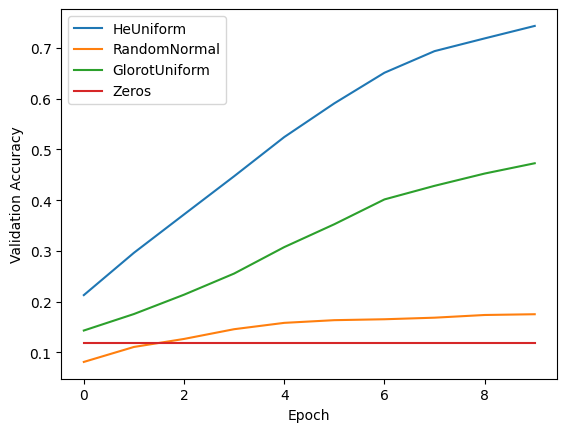

In [22]:
for i in [model_heu, model_normal, model_glorotu, model_zeros]:
    plt.plot(i.history.history['val_accuracy'], label=i.get_config()['layers'][1]['config']['kernel_initializer']['class_name'])

plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')

In [23]:
def simple_model_bn(initializer = 'he_uniform', activation='relu'):
    return tf.keras.Sequential([layers.Dense(32, activation, input_shape=(784,), kernel_initializer=initializer),
                                layers.BatchNormalization(trainable=True, scale=True, center=True),
                                layers.Dense(32, activation, kernel_initializer=initializer),
                                layers.BatchNormalization(trainable=True, scale=True, center=True),
                                layers.Dense(32, activation, kernel_initializer=initializer),
                                layers.BatchNormalization(trainable=True, scale=True, center=True),
                                layers.Dense(32, activation, kernel_initializer=initializer),
                                layers.BatchNormalization(trainable=True, scale=True, center=True),
                                layers.Dense(10, activation = 'softmax', kernel_initializer=tf.keras.initializers.glorot_normal())



    ])

In [25]:
simple_model_bn().summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 32)                25120     
                                                                 
 batch_normalization_4 (Bat  (None, 32)                128       
 chNormalization)                                                
                                                                 
 dense_26 (Dense)            (None, 32)                1056      
                                                                 
 batch_normalization_5 (Bat  (None, 32)                128       
 chNormalization)                                                
                                                                 
 dense_27 (Dense)            (None, 32)                1056      
                                                                 
 batch_normalization_6 (Bat  (None, 32)               

In [26]:
init = tf.keras.initializers.random_normal()
activate = 'relu'

optimizer = tf.keras.optimizers.SGD(0.01)
model_bn = simple_model_bn(init, activate)
model_bn.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model_bn.fit(X_train, y_train, epochs=10, batch_size=3200, validation_data = (X_test, y_test))

c:\Users\gabri\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\initializers\initializers.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


Epoch 1/10
19/19 [==============================] - 8s 115ms/step - loss: 2.0728 - accuracy: 0.3230 - val_loss: 2.2958 - val_accuracy: 0.1853
Epoch 2/10
19/19 [==============================] - 1s 53ms/step - loss: 1.3669 - accuracy: 0.5774 - val_loss: 2.2866 - val_accuracy: 0.1758
Epoch 3/10
19/19 [==============================] - 1s 51ms/step - loss: 1.0524 - accuracy: 0.6851 - val_loss: 2.2724 - val_accuracy: 0.1904
Epoch 4/10
19/19 [==============================] - 1s 51ms/step - loss: 0.8691 - accuracy: 0.7462 - val_loss: 2.2524 - val_accuracy: 0.2129
Epoch 5/10
19/19 [==============================] - 1s 53ms/step - loss: 0.7513 - accuracy: 0.7836 - val_loss: 2.2255 - val_accuracy: 0.2516
Epoch 6/10
19/19 [==============================] - 1s 52ms/step - loss: 0.6702 - accuracy: 0.8064 - val_loss: 2.1897 - val_accuracy: 0.3160
Epoch 7/10
19/19 [==============================] - 1s 50ms/step - loss: 0.6089 - accuracy: 0.8251 - val_loss: 2.1437 - val_accuracy: 0.3994
Epoch 8/10
1

In [27]:
#Can play with parameters in Adagrad, can use gridsearch
init = tf.keras.initializers.random_uniform()
activate = 'relu'

optimizer = tf.keras.optimizers.Adagrad(learning_rate=0.01)
model_bn_ad = simple_model_bn(init, activate)
model_bn_ad.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model_bn_ad.fit(X_train, y_train, epochs=10, batch_size=3200, validation_data = (X_test, y_test))

c:\Users\gabri\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\initializers\initializers.py:120: UserWarning: The initializer RandomUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


Epoch 1/10
19/19 [==============================] - 9s 127ms/step - loss: 1.1264 - accuracy: 0.6622 - val_loss: 2.2974 - val_accuracy: 0.3164
Epoch 2/10
19/19 [==============================] - 1s 55ms/step - loss: 0.5137 - accuracy: 0.8668 - val_loss: 2.2916 - val_accuracy: 0.2139
Epoch 3/10
19/19 [==============================] - 1s 53ms/step - loss: 0.3836 - accuracy: 0.9002 - val_loss: 2.2847 - val_accuracy: 0.1912
Epoch 4/10
19/19 [==============================] - 1s 51ms/step - loss: 0.3204 - accuracy: 0.9179 - val_loss: 2.2759 - val_accuracy: 0.2206
Epoch 5/10
19/19 [==============================] - 1s 53ms/step - loss: 0.2808 - accuracy: 0.9284 - val_loss: 2.2634 - val_accuracy: 0.2484
Epoch 6/10
19/19 [==============================] - 1s 53ms/step - loss: 0.2519 - accuracy: 0.9362 - val_loss: 2.2470 - val_accuracy: 0.2590
Epoch 7/10
19/19 [==============================] - 1s 55ms/step - loss: 0.2301 - accuracy: 0.9419 - val_loss: 2.2253 - val_accuracy: 0.2860
Epoch 8/10
1

In [28]:
init = tf.keras.initializers.random_uniform()
activate = 'relu'

optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
model_bn_adam = simple_model_bn(init, activate)
model_bn_adam.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model_bn_adam.fit(X_train, y_train, epochs=10, batch_size=3200, validation_data = (X_test, y_test))

Epoch 1/10
19/19 [==============================] - 13s 117ms/step - loss: 0.8670 - accuracy: 0.7323 - val_loss: 2.0641 - val_accuracy: 0.5398
Epoch 2/10
19/19 [==============================] - 1s 50ms/step - loss: 0.2543 - accuracy: 0.9254 - val_loss: 1.8397 - val_accuracy: 0.4999
Epoch 3/10
19/19 [==============================] - 1s 54ms/step - loss: 0.1760 - accuracy: 0.9477 - val_loss: 1.6862 - val_accuracy: 0.5753
Epoch 4/10
19/19 [==============================] - 1s 54ms/step - loss: 0.1326 - accuracy: 0.9611 - val_loss: 1.5212 - val_accuracy: 0.7617
Epoch 5/10
19/19 [==============================] - 1s 52ms/step - loss: 0.1098 - accuracy: 0.9674 - val_loss: 1.3474 - val_accuracy: 0.8518
Epoch 6/10
19/19 [==============================] - 1s 51ms/step - loss: 0.0891 - accuracy: 0.9748 - val_loss: 1.1402 - val_accuracy: 0.9027
Epoch 7/10
19/19 [==============================] - 1s 53ms/step - loss: 0.0744 - accuracy: 0.9785 - val_loss: 0.9017 - val_accuracy: 0.9263
Epoch 8/10


In [29]:
from tensorflow.keras.callbacks import EarlyStopping

In [32]:
init = tf.keras.initializers.random_uniform()
activate = 'relu'

optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
model_bn_adam = simple_model_bn(init, activate)
model_bn_adam.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss', mode='min', patience=10, restore_best_weights=True, verbose=1)

history = model_bn_adam.fit(X_train, y_train, epochs=10, batch_size=3200, validation_data = (X_test, y_test))

_, train_acc = model_bn_adam.evaluate(X_train, y_train, verbose=0)
_, test_acc = model_bn_adam.evaluate(X_test, y_test, verbose=0)
print('Train Acc:', train_acc, 'Test Acc:', test_acc)

Epoch 1/10
19/19 [==============================] - 4s 35ms/step - loss: 0.7823 - accuracy: 0.7575 - val_loss: 2.0310 - val_accuracy: 0.3679
Epoch 2/10
19/19 [==============================] - 0s 15ms/step - loss: 0.2492 - accuracy: 0.9264 - val_loss: 1.7926 - val_accuracy: 0.5003
Epoch 3/10
19/19 [==============================] - 0s 14ms/step - loss: 0.1756 - accuracy: 0.9476 - val_loss: 1.6383 - val_accuracy: 0.5827
Epoch 4/10
19/19 [==============================] - 0s 14ms/step - loss: 0.1362 - accuracy: 0.9595 - val_loss: 1.4709 - val_accuracy: 0.6884
Epoch 5/10
19/19 [==============================] - 0s 13ms/step - loss: 0.1089 - accuracy: 0.9683 - val_loss: 1.3070 - val_accuracy: 0.8031
Epoch 6/10
19/19 [==============================] - 0s 12ms/step - loss: 0.0889 - accuracy: 0.9736 - val_loss: 1.1279 - val_accuracy: 0.8456
Epoch 7/10
19/19 [==============================] - 0s 13ms/step - loss: 0.0783 - accuracy: 0.9771 - val_loss: 0.9511 - val_accuracy: 0.8688
Epoch 8/10
19

In [33]:
init = tf.keras.initializers.random_uniform()
activate = 'relu'

optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
model_bn_adam = simple_model_bn(init, activate)
model_bn_adam.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss', mode='min', patience=10, restore_best_weights=True, verbose=1)

history = model_bn_adam.fit(X_train, y_train, epochs=2000, callbacks=[es], validation_data = (X_test, y_test), verbose=0)

_, train_acc = model_bn_adam.evaluate(X_train, y_train, verbose=0)
_, test_acc = model_bn_adam.evaluate(X_test, y_test, verbose=0)
print('Train Acc:', train_acc, 'Test Acc:', test_acc)

Restoring model weights from the end of the best epoch: 12.
Epoch 22: early stopping
Train Acc: 0.9898166656494141 Test Acc: 0.9693999886512756
